In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
train_dir = "/content/drive/MyDrive/Sayem_Potato_Leaf_/PlantVillage2/Training"
val_dir = "/content/drive/MyDrive/Sayem_Potato_Leaf_/PlantVillage2/Validation"

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  # validation_split=0.25,
  # subset="training",
  # seed=123,
  image_size=(128,128),
  batch_size=64)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  # validation_split=0.25,
  # subset="validation",
  # seed=123,
  image_size=(128,128),
  batch_size=64
  )

Found 2150 files belonging to 3 classes.
Using 1613 files for training.
Found 2150 files belonging to 3 classes.
Using 537 files for validation.


In [ ]:
vgg = VGG19(input_shape = (128, 128, 3), weights = 'imagenet', include_top = False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
history = model.fit(train_ds, validation_data = val_ds, epochs = 15, batch_size = 64,
                    shuffle=True)

Epoch 1/15
26/26 [==============================] - 262s 7s/step - loss: 2.8554 - accuracy: 0.7936 - val_loss: 1.1394 - val_accuracy: 0.9050
Epoch 2/15
26/26 [==============================] - 5s 160ms/step - loss: 0.3075 - accuracy: 0.9492 - val_loss: 0.6934 - val_accuracy: 0.9404
Epoch 3/15
26/26 [==============================] - 5s 164ms/step - loss: 0.0673 - accuracy: 0.9851 - val_loss: 0.5400 - val_accuracy: 0.9460
Epoch 4/15
26/26 [==============================] - 6s 203ms/step - loss: 0.0302 - accuracy: 0.9919 - val_loss: 0.5205 - val_accuracy: 0.9516
Epoch 5/15
26/26 [==============================] - 5s 171ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.5880 - val_accuracy: 0.9423
Epoch 6/15
26/26 [==============================] - 6s 209ms/step - loss: 5.9192e-04 - accuracy: 1.0000 - val_loss: 0.5760 - val_accuracy: 0.9479
Epoch 7/15
26/26 [==============================] - 5s 167ms/step - loss: 1.1712e-04 - accuracy: 1.0000 - val_loss: 0.5603 - val_accuracy: 0.9497

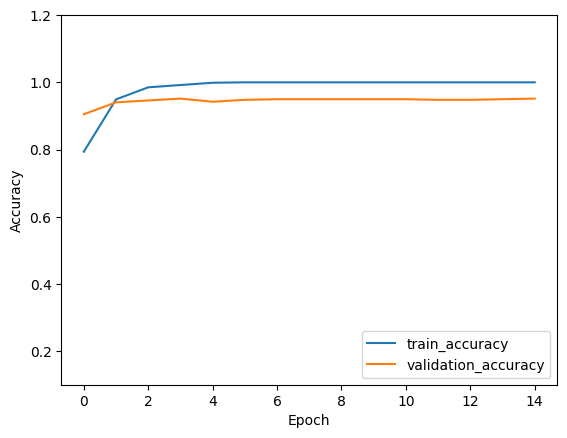

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1.2])
plt.legend(loc='lower right')

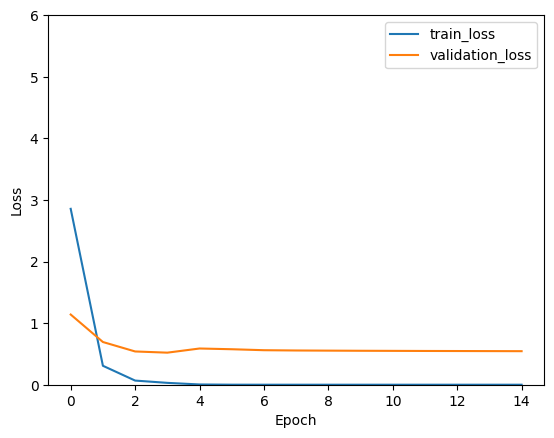

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 6])
plt.legend(loc='upper right')

1/1 [==============================] - 0s 164ms/step


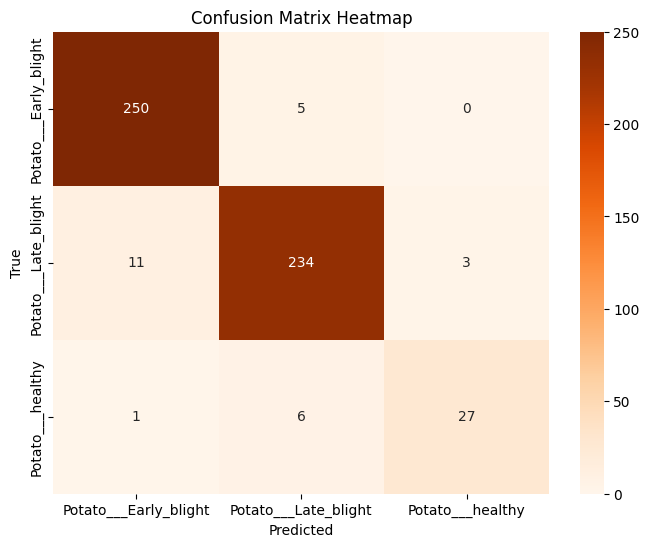

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

all_val_labels = []
all_val_predictions = []

# Evaluate the model on the validation dataset batch by batch
for batch in val_ds:
    val_images, val_labels_batch = batch
    val_predictions_batch = model.predict(val_images)

    val_labels_batch = np.array(val_labels_batch)
    val_predictions_batch = np.argmax(val_predictions_batch, axis=-1)

    all_val_labels.extend(val_labels_batch)
    all_val_predictions.extend(val_predictions_batch)

# Calculate the confusion matrix for all validation data
conf_matrix = confusion_matrix(all_val_labels, all_val_predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
print(classification_report(all_val_labels, all_val_predictions, target_names=class_names))

                       precision    recall  f1-score   support

Potato___Early_blight       0.95      0.98      0.97       255
 Potato___Late_blight       0.96      0.94      0.95       248
     Potato___healthy       0.90      0.79      0.84        34

             accuracy                           0.95       537
            macro avg       0.94      0.91      0.92       537
         weighted avg       0.95      0.95      0.95       537

